In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\minha\OneDrive\Desktop\stock_price_dataset.csv")

In [3]:
df

,Adj Close,Close,High,Low,Open,Volume,Company,Date,Target,Score,Comments,Cleaned_Text,Sentiment,Sentiment_Score
0,8.532785,10.115357,10.135000,9.851786,9.860000,658677600.0,Apple,9/20/2010,1.0,0,0,stock market game iphone ipad play,Positive,0.999895
1,8.712500,8.712500,8.897000,8.686500,8.816500,84050000.0,Amazon,12/13/2010,1.0,7,5,hussman warning awful time invest,Neutral,0.553402
2,8.778500,8.778500,8.950000,8.679500,8.686000,116210000.0,Amazon,12/15/2010,1.0,8,0,awful time invest reflection lost opportunity,Negative,0.982149
3,8.887500,8.887500,8.987500,8.728000,8.843000,93130000.0,Amazon,2/24/2011,1.0,5,1,amazon prime streaming disrupt netflix,Negative,0.977377
4,11.446334,13.569286,13.602857,13.282143,13.321429,467832400.0,Apple,9/12/2011,-1.0,5,16,personally im fan theyre already beatendown pr...,Negative,0.993987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,170.000000,170.000000,171.600006,169.781494,170.042496,66316000.0,Amazon,4/13/2021,1.0,44,43,thought viacom need recap margin call fiasco k...,Neutral,0.931414
12149,254.106674,254.106674,254.333328,236.886673,237.566666,133958400.0,Tesla,4/13/2021,-1.0,1324,922,ride brief overview lordstown motor corp ride ...,Positive,0.999995
12150,254.106674,254.106674,254.333328,236.886673,237.566666,133958400.0,Tesla,4/13/2021,-1.0,1,8,bought 13 may 21 2021 put f thought taking spr...,Positive,0.998987
12151,244.076660,244.076660,260.263336,242.676666,256.899994,147052200.0,Tesla,4/14/2021,-1.0,56,905,daily discussion run monday friday including t...,Positive,0.999992


In [4]:
print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")

Number of Rows: 12153 
Number of Columns: 14


In [5]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Company,Date,Target,Score,Comments,Cleaned_Text,Sentiment,Sentiment_Score
0,8.532785,10.115357,10.135000,9.851786,9.860000,658677600.0,Apple,9/20/2010,1.0,0,0,stock market game iphone ipad play,Positive,0.999895
1,8.712500,8.712500,8.897000,8.686500,8.816500,84050000.0,Amazon,12/13/2010,1.0,7,5,hussman warning awful time invest,Neutral,0.553402
2,8.778500,8.778500,8.950000,8.679500,8.686000,116210000.0,Amazon,12/15/2010,1.0,8,0,awful time invest reflection lost opportunity,Negative,0.982149
3,8.887500,8.887500,8.987500,8.728000,8.843000,93130000.0,Amazon,2/24/2011,1.0,5,1,amazon prime streaming disrupt netflix,Negative,0.977377
4,11.446334,13.569286,13.602857,13.282143,13.321429,467832400.0,Apple,9/12/2011,-1.0,5,16,personally im fan theyre already beatendown pr...,Negative,0.993987


In [6]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume,Company,Date,Target,Score,Comments,Cleaned_Text,Sentiment,Sentiment_Score
12148,170.000000,170.000000,171.600006,169.781494,170.042496,66316000.0,Amazon,4/13/2021,1.0,44,43,thought viacom need recap margin call fiasco k...,Neutral,0.931414
12149,254.106674,254.106674,254.333328,236.886673,237.566666,133958400.0,Tesla,4/13/2021,-1.0,1324,922,ride brief overview lordstown motor corp ride ...,Positive,0.999995
12150,254.106674,254.106674,254.333328,236.886673,237.566666,133958400.0,Tesla,4/13/2021,-1.0,1,8,bought 13 may 21 2021 put f thought taking spr...,Positive,0.998987
12151,244.076660,244.076660,260.263336,242.676666,256.899994,147052200.0,Tesla,4/14/2021,-1.0,56,905,daily discussion run monday friday including t...,Positive,0.999992
12152,244.076660,244.076660,260.263336,242.676666,256.899994,147052200.0,Tesla,4/14/2021,-1.0,26,76,ive tried estimate 10year return holding tsla ...,Positive,0.998830


In [7]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume,Target,Comments,Sentiment_Score
count,1.190300e+04,12153.000000,11695.000000,12153.000000,11740.000000,1.183300e+04,12137.000000,12153.000000,12092.000000
mean,8.401262e+08,144.707331,151.921883,142.051467,147.583426,1.173015e+08,-0.072588,414.247922,0.959534
std,9.165830e+10,81.246912,81.114397,79.295416,81.012098,1.017500e+08,0.997320,2155.361211,0.100881
min,1.960000e+00,1.960000,2.006667,1.910000,2.000000,1.944450e+07,-1.000000,0.000000,0.378988
25%,8.282900e+01,85.072502,94.666664,83.875000,91.464996,6.177760e+07,-1.000000,14.000000,0.988111
50%,1.509868e+02,150.820007,157.134995,148.610001,154.644997,8.986400e+07,-1.000000,60.000000,0.999493
75%,1.911404e+02,190.563339,195.289993,187.350006,192.110001,1.352690e+08,1.000000,224.000000,0.999957
max,1.000000e+13,409.970001,414.496674,405.666656,411.470001,1.506120e+09,1.000000,90822.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adj Close        11903 non-null  float64
 1   Close            12153 non-null  float64
 2   High             11695 non-null  float64
 3   Low              12153 non-null  float64
 4   Open             11740 non-null  float64
 5   Volume           11833 non-null  float64
 6   Company          11944 non-null  object 
 7   Date             12153 non-null  object 
 8   Target           12137 non-null  float64
 9   Score            11652 non-null  object 
 10  Comments         12153 non-null  int64  
 11  Cleaned_Text     11981 non-null  object 
 12  Sentiment        12153 non-null  object 
 13  Sentiment_Score  12092 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.3+ MB


In [9]:
print("-- Attributes in Data --")
for cols in df.columns:
    print(cols)

-- Attributes in Data --
Adj Close
Close
High
Low
Open
Volume
Company
Date
Target
Score
Comments
Cleaned_Text
Sentiment
Sentiment_Score


In [10]:
df = df.drop(columns=["Comments","Date","Cleaned_Text","Company","Close","Sentiment"])

In [11]:
df.nunique()

Adj Close          4980
High               4518
Low                4861
Open               4658
Volume             4980
Target                3
Score              2470
Sentiment_Score    7998
dtype: int64

In [12]:
print("-- Number of Null Values in Data --")
df.isnull().sum()

-- Number of Null Values in Data --


Adj Close          250
High               458
Low                  0
Open               413
Volume             320
Target              16
Score              501
Sentiment_Score     61
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(88)

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
for i in df.select_dtypes(include="number").columns:
    df[i] = df[i].fillna(df[i].mean())

In [16]:
for i in df.select_dtypes(include="object").columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [17]:
df.isnull().sum()

Adj Close          0
High               0
Low                0
Open               0
Volume             0
Target             0
Score              0
Sentiment_Score    0
dtype: int64

In [18]:
le = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
    df[i] = le.fit_transform(df[i])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12065 entries, 0 to 12068
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adj Close        12065 non-null  float64
 1   High             12065 non-null  float64
 2   Low              12065 non-null  float64
 3   Open             12065 non-null  float64
 4   Volume           12065 non-null  float64
 5   Target           12065 non-null  float64
 6   Score            12065 non-null  int64  
 7   Sentiment_Score  12065 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 848.3 KB


In [20]:
df = df.select_dtypes(include="number").astype("int64")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12065 entries, 0 to 12068
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Adj Close        12065 non-null  int64
 1   High             12065 non-null  int64
 2   Low              12065 non-null  int64
 3   Open             12065 non-null  int64
 4   Volume           12065 non-null  int64
 5   Target           12065 non-null  int64
 6   Score            12065 non-null  int64
 7   Sentiment_Score  12065 non-null  int64
dtypes: int64(8)
memory usage: 848.3 KB


In [22]:
columns = ["Target"]
for i in columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr

    df = df[(df[i]>=lower_limit) & (df[i]<=upper_limit)]

In [23]:
df

,Adj Close,High,Low,Open,Volume,Target,Score,Sentiment_Score
0,8,10,9,9,658677600,1,0,0
1,8,8,8,8,84050000,1,2082,0
2,8,8,8,8,116210000,1,2229,0
3,8,8,8,8,93130000,1,1729,0
4,11,13,13,13,467832400,-1,1729,0
...,...,...,...,...,...,...,...,...
12064,205,207,205,206,28061600,1,0,0
12065,205,207,205,206,28061600,1,1257,0
12066,207,208,204,205,24892400,1,0,0
12067,237,237,233,234,28481400,0,0,0


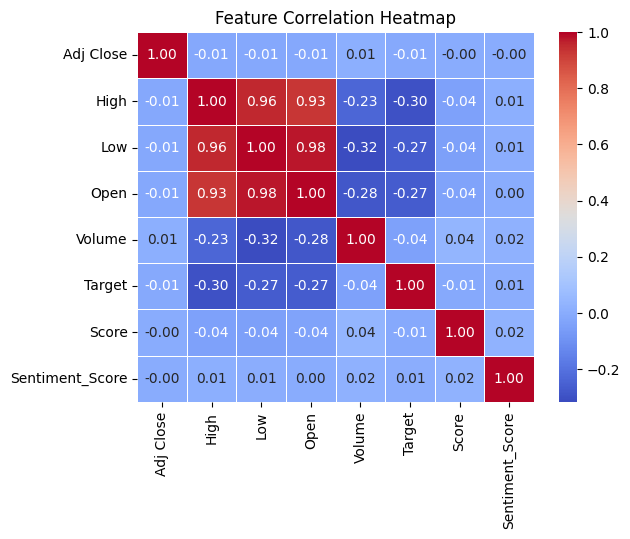

In [24]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
x = df.drop(columns=["Sentiment_Score"])
y = df["Sentiment_Score"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 0.0190
Mean Squared Error (MSE): 0.0090


In [30]:
random = RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
r_pred = random.predict(x_test)

In [32]:
accuracy = accuracy_score(r_pred,y_test)
print(f"Model Accuracy:{accuracy:.2f}%")

Model Accuracy:0.99%


In [ ]:

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
